In [493]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA

from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

%matplotlib  inline
pal = sns.set_palette(sns.color_palette("OrRd_r", 6))

In [494]:
# read in all three csv files
df_full = pd.read_csv('Recipes_Full.csv', index_col = 'Unnamed: 0')
df_cats = pd.read_csv('Recipes_Categories.csv', index_col = 'Unnamed: 0')
df_ingr = pd.read_csv('Recipes_Ingredients.csv', index_col = 'Unnamed: 0')

In [495]:
df_cats.head()

,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,...,Vegan,Vegetarian,Vermont,Virginia,Washington,"Washington, D.C.",Weelicious,Wheat/Gluten-Free,Winter,Wisconsin
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00.000,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00.000,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00.000,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00.000,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00.000,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [496]:
df_cats.shape

(20052, 256)

In [497]:
clusters_allrecipes_df = pd.DataFrame(df_cats['Title'])
clusters_meals_df = pd.DataFrame()

# K-Means Clustering

In [498]:
# transform binary category columns into a matrix
categories_matrix = np.matrix(df_cats.as_matrix())[:,8:]
categories_matrix.shape

(20052, 248)

## Clustering by all Categories

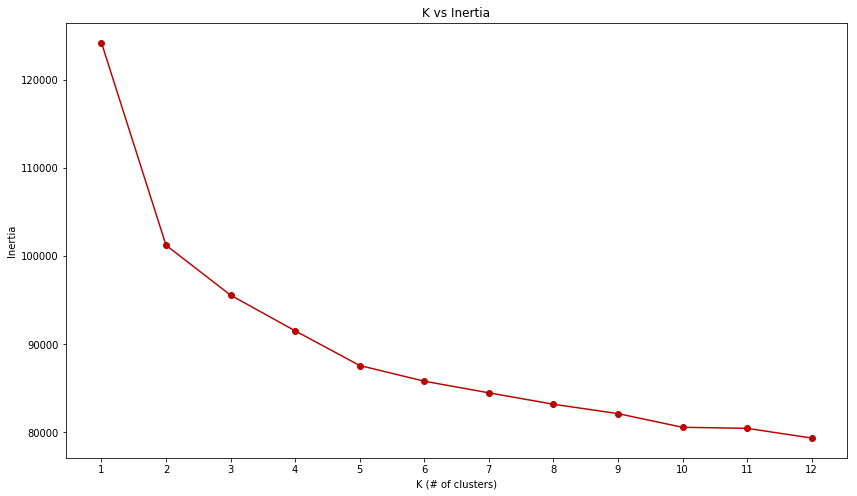

In [499]:
# iterate through Ks from 1 to 12 and append results to list
results = []
ks = range(1, 13)
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix)   
    # Append the inertia to the list of results
    results.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

I would say that the elbow is either at k=5 or k=10. Let's see how many recipes fall into each cluster when k=5 and k=10.

   cluster5
0      3093
1      6456
2      2778
3      2630
4      5095


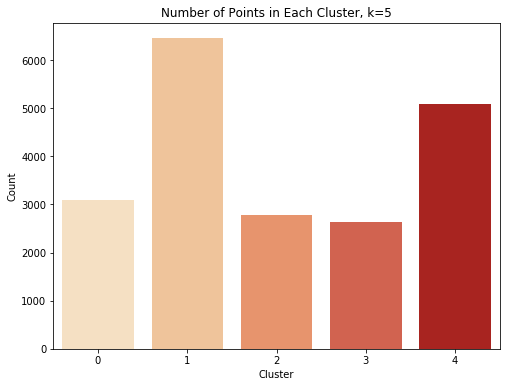

In [500]:
# computer kmeans where k=5
k_5 = 5
kmeans_5 = KMeans(n_clusters=k_5, random_state=10)
clusters_allrecipes_df['cluster5'] = kmeans_5.fit_predict(categories_matrix)
cluster_count_5 = pd.DataFrame(clusters_allrecipes_df['cluster5'].value_counts().sort_index())
print(cluster_count_5)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_5.index, y=cluster_count_5.cluster5, palette = 'OrRd')
plt.xticks(cluster_count_5.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=5')
plt.show()

   cluster10
0       1412
1       4871
2       1483
3       2231
4       2462
5       1679
6       1542
7        801
8       1715
9       1856


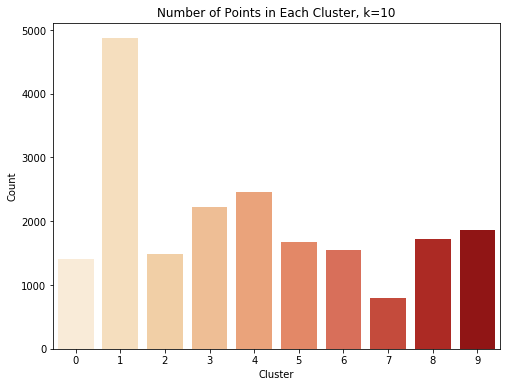

In [501]:
# computer kmeans where k=5
k_10 = 10
kmeans_10 = KMeans(n_clusters=k_10, random_state=10)
clusters_allrecipes_df['cluster10'] = kmeans_10.fit_predict(categories_matrix)
cluster_count_10 = pd.DataFrame(clusters_allrecipes_df['cluster10'].value_counts().sort_index())
print(cluster_count_10)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_10.index, y=cluster_count_10.cluster10, palette = 'OrRd')
plt.xticks(cluster_count_10.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=10')
plt.show()

I think that k=5 is more reasonable, but do we really want to limit how many customer segments we will have? We have a lot of categories, so it might be better to have 10 clusters. Let's check the silhouette scores for the various sizes of k.

In [502]:
# compute silhouette score for k=5
silhouette_avg_5 = silhouette_score(categories_matrix, clusters_allrecipes_df['cluster5'])

In [503]:
# compute silhouette score for k=10
silhouette_avg_10 = silhouette_score(categories_matrix, clusters_allrecipes_df['cluster10'])

In [504]:
print('Silhouette scores:')
print('k=5:', round(silhouette_avg_5,4))
print('k=10:', round(silhouette_avg_10,4))

Silhouette scores:
k=5: 0.0902
k=10: 0.0797


k=5 provides us with the higher silhouette score, but neither score is very high. Let's see if we can reduce our data set to only include rows where the recipe is at least categorized as a meal or part of a whole meal (e.g. appetizer or dessert). This will help us remove recipes for ingredients, such as chicken stock or salsa.

## Clustering by Categories where Recipe is Identified as a Meal

In [505]:
# create list of meal categories
meals = ['Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert']

# new column to identify if a recipe is for a meal category
df_cats['Meal Sum'] = df_cats['Breakfast'] + df_cats['Lunch'] + df_cats[
                        'Brunch'] + df_cats['Dinner'] + df_cats['Appetizer'] + df_cats[
                        'Dessert']

# remove recipe row if it's not a meal
df_cats_meals = df_cats.loc[df_cats['Meal Sum'] > 0].loc[:, :'Wisconsin']
df_cats_meals.shape

(8763, 256)

In [506]:
df_cats_meals.columns

Index(['Title', 'Rating', 'Rating Group', 'Date Time', 'Calories', 'Protein',
       'Fat', 'Sodium', '22-Minute Meals', '3-Ingredient Recipes',
       ...
       'Vegan', 'Vegetarian', 'Vermont', 'Virginia', 'Washington',
       'Washington, D.C.', 'Weelicious', 'Wheat/Gluten-Free', 'Winter',
       'Wisconsin'],
      dtype='object', length=256)

In [507]:
# let's also remove columns if there are no rows that have that category
df_cats_meals.drop([col for col, val in df_cats_meals.sum().iteritems() if val == 0], axis=1, inplace=True)
df_cats_meals.shape

(8763, 248)

In [508]:
clusters_meals_df = df_cats_meals[['Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert']]

We've reduced our data set down to only 8,763 rows. Let's rerun the K-Means algorithm to see what results we get.

In [509]:
# transform binary category columns into a matrix
categories_matrix_meals = np.matrix(df_cats_meals.as_matrix())[:,8:]
categories_matrix_meals.shape

(8763, 240)

In [510]:
categories_matrix_meals

matrix([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ..., 
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

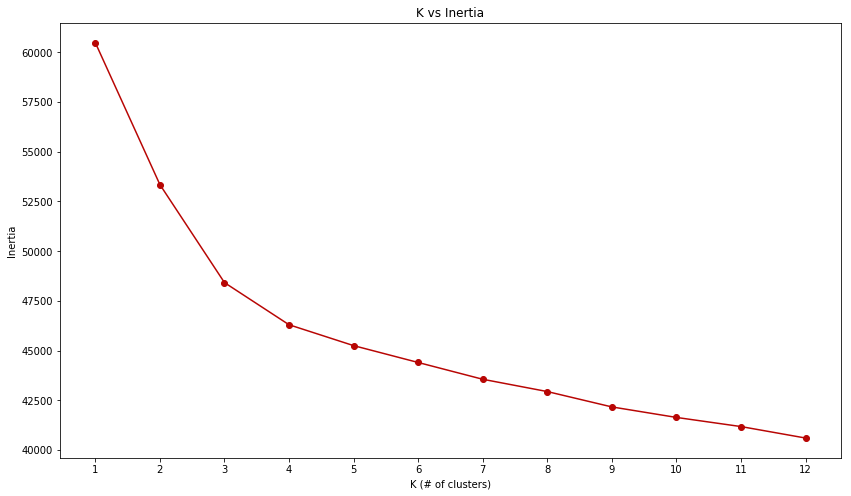

In [511]:
# iterate through Ks from 1 to 12 and append results to list
results_meals = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix_meals)   
    # Append the inertia to the list of results
    results_meals.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_meals, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

It looks like the elbow in the graph is around k=4. Let's compute the silhouette scores to see if we're getting better results with this extract of data.

In [512]:
# initiate dictionary and range for for loop
avg_s_scores_meals = {}
range_n_clusters = range(2,13)

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(categories_matrix_meals)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(categories_matrix_meals, cluster_labels)
    avg_s_scores_meals[k] = silhouette_avg

In [513]:
# print all scores from dictionary
for key, value in avg_s_scores_meals.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.119
k = 3 : 0.1272
k = 4 : 0.1215
k = 5 : 0.1022
k = 6 : 0.113
k = 7 : 0.0789
k = 8 : 0.0632
k = 9 : 0.0636
k = 10 : 0.0628
k = 11 : 0.0574
k = 12 : 0.0684


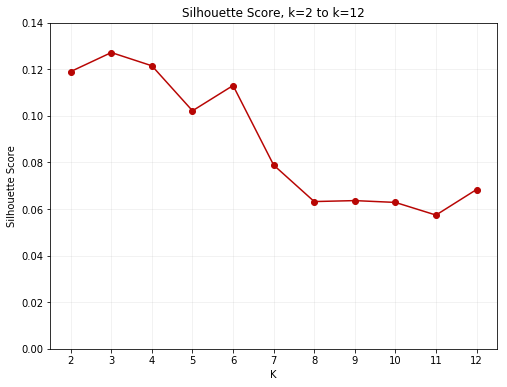

In [514]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_meals.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=12')
plt.grid(True, alpha=.2)
plt.show()

We've ended up with higher silhouette scores than before! And k=3 for our meal dataset results in the maximum silhouette score. But is this too few clusters for the segmentation? I think that k=6 is a more appropriate number of clusters. Let's check to see how the clusters are distributed for k=3 and k=6.

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   cluster3
0      3538
1      2209
2      3016


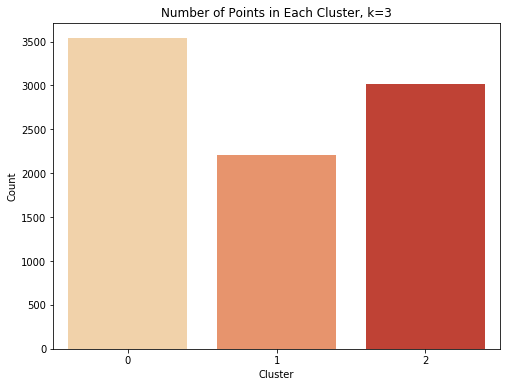

In [515]:
# computer kmeans where k=3
k_3 = 3
kmeans_3 = KMeans(n_clusters=k_3, random_state=10)
clusters_meals_df['cluster3'] = kmeans_3.fit_predict(categories_matrix_meals)
cluster_count_3 = pd.DataFrame(clusters_meals_df['cluster3'].value_counts().sort_index())
print(cluster_count_3)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_3.index, y=cluster_count_3.cluster3, palette = 'OrRd')
plt.xticks(cluster_count_3.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=3')
plt.show()

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   cluster6
0      1142
1      1344
2      1299
3      2149
4      2096
5       733


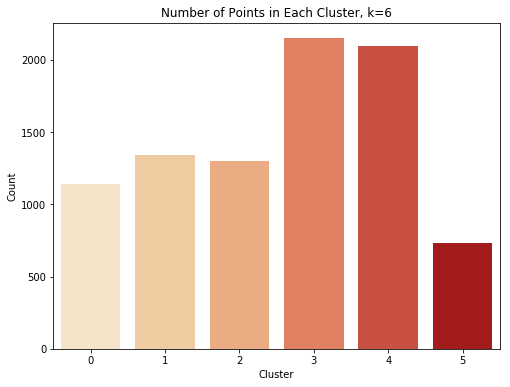

In [516]:
# computer kmeans where k=6
k_6 = 6
kmeans_6 = KMeans(n_clusters=k_6, random_state=10)
clusters_meals_df['cluster6'] = kmeans_6.fit_predict(categories_matrix_meals)
cluster_count_6 = pd.DataFrame(clusters_meals_df['cluster6'].value_counts().sort_index())
print(cluster_count_6)

# plot bar graph of clusters and number of data points in each cluster
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_count_6.index, y=cluster_count_6.cluster6, palette = 'OrRd')
plt.xticks(cluster_count_6.index)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Points in Each Cluster, k=6')
plt.show()

My biggest concern for k=6 is that each cluster just contains one of our meal types (e.g. Breakfast or Dinner). If this ends up being the case, we may have to try reducing our data set to just be one type of meal.

In [517]:
# k=6, cluster=0
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 0].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
34,Fontina Mac with Squash and Sage,0.0,1.0,0.0,1.0,0.0,0.0,0
47,Herbed Goat Cheese Spread with Mint,0.0,0.0,0.0,1.0,1.0,0.0,0
61,"Romaine, Grilled Avocado, and Smoky Corn Salad...",0.0,1.0,0.0,0.0,0.0,0.0,0
66,Scarborough Fair Tofu Burger,0.0,1.0,0.0,1.0,0.0,0.0,0
70,"Roasted Butternut Squash, Rosemary, and Garlic...",0.0,0.0,0.0,1.0,0.0,0.0,0
89,Ricotta Omelets,1.0,0.0,1.0,0.0,0.0,0.0,0
128,Spicy Sesame Noodles with Chopped Peanuts and ...,0.0,0.0,0.0,1.0,0.0,0.0,0
133,Radishes with Burrata,0.0,1.0,0.0,0.0,0.0,0.0,0
150,Jalapeño-Cheddar Frittata,0.0,0.0,1.0,0.0,1.0,0.0,0
151,Roasted Beets and Citrus with Feta,0.0,0.0,0.0,1.0,1.0,0.0,0


In [518]:
# k=6, cluster=1
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 1].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
35,Aztec Chicken,0.0,0.0,0.0,1.0,0.0,0.0,1
43,Purple-Potato and Crab Gratin,0.0,1.0,0.0,0.0,0.0,0.0,1
53,Pancetta Roast Chicken with Walnut Stuffing,0.0,0.0,0.0,1.0,0.0,0.0,1
102,Parsnip and Apple Soup,0.0,0.0,0.0,0.0,1.0,0.0,1
103,Short Rib Pot Pie,0.0,0.0,0.0,1.0,0.0,0.0,1
146,Sage-Roasted Turkey with Caramelized Onions an...,0.0,0.0,0.0,1.0,0.0,0.0,1
147,Shrimp Cakes with Andouille Sausage,0.0,1.0,0.0,0.0,1.0,0.0,1
155,"Sauteed Veal with Shrimp, Mushroom, and Brandy...",0.0,0.0,0.0,1.0,0.0,0.0,1
170,Red Wine Brasato with Glazed Root Vegetables,0.0,0.0,0.0,1.0,0.0,0.0,1
178,Baked Beans with Slab Bacon and Breadcrumbs,0.0,0.0,0.0,1.0,0.0,0.0,1


In [519]:
# k=6, cluster=2
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 2].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,1.0,0.0,0.0,2
9,Ham Persillade with Mustard Potato Salad and M...,0.0,1.0,0.0,0.0,0.0,0.0,2
19,"Tuna, Asparagus, and New Potato Salad with Chi...",0.0,1.0,0.0,0.0,0.0,0.0,2
30,Asian Steak Topped with Bell Pepper Stir-Fry,0.0,0.0,0.0,1.0,0.0,0.0,2
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.0,0.0,0.0,0.0,0.0,1.0,2
44,"Grilled Beef, Jícama, and Apple Salad",0.0,0.0,0.0,1.0,0.0,0.0,2
50,Mexican Chile and Mushroom Soup,0.0,1.0,0.0,0.0,0.0,0.0,2
52,Braised Chicken With Artichokes and Olives,0.0,0.0,0.0,1.0,0.0,0.0,2
55,Collard-and-Prosciutto Chicken Roulades Over W...,0.0,0.0,0.0,1.0,0.0,0.0,2
80,"Braised Chicken and Rice with Orange, Saffron,...",0.0,0.0,0.0,1.0,0.0,0.0,2


In [520]:
# k=6, cluster=3
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 3].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
11,Spicy Noodle Soup,1.0,0.0,0.0,0.0,0.0,0.0,3
22,Fish Fillets in Parchment with Asparagus and O...,0.0,0.0,0.0,1.0,0.0,0.0,3
23,Pancetta and Taleggio Lasagna with Treviso,0.0,0.0,0.0,1.0,0.0,0.0,3
51,Peanut Butter-Banana Muffins,1.0,0.0,1.0,0.0,0.0,0.0,3
54,1977 Coconut Angel Food Cake,0.0,0.0,0.0,0.0,0.0,1.0,3
76,South American-Style Jícama and Orange Salad,0.0,0.0,0.0,0.0,1.0,0.0,3
78,Maple Pumpkin Pots de Crème,0.0,0.0,0.0,0.0,0.0,1.0,3
86,Bacon Crackers,0.0,0.0,0.0,0.0,1.0,0.0,3
87,Roast Chicken With Sorghum and Squash,0.0,0.0,0.0,1.0,0.0,0.0,3
97,Roast Beef Salad with Cabbage and Horseradish,0.0,1.0,0.0,0.0,0.0,0.0,3


In [521]:
# k=6, cluster=4
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 4].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
12,Banana-Chocolate Chip Cake With Peanut Butter ...,0.0,0.0,0.0,0.0,0.0,1.0,4
16,Sweet Buttermilk Spoon Breads,1.0,0.0,1.0,0.0,0.0,1.0,4
29,Apricot-Cherry Shortcakes,0.0,0.0,0.0,0.0,0.0,1.0,4
40,Coconut-Key Lime Sheet Cake,0.0,0.0,0.0,0.0,0.0,1.0,4
57,Pumpkin Muffins,1.0,0.0,1.0,0.0,0.0,0.0,4
64,Mixed Berry Pavlovas,0.0,0.0,0.0,0.0,0.0,1.0,4
65,Orange-Almond Cake with Chocolate Icing,0.0,0.0,0.0,0.0,0.0,1.0,4
68,White Chocolate Tartlets with Strawberries and...,0.0,0.0,0.0,0.0,0.0,1.0,4
72,Pear-Hazelnut Cheesecakes with Pear-Raspberry ...,0.0,0.0,0.0,0.0,0.0,1.0,4
75,Banana Layer Cake with Cream Cheese Frosting,0.0,0.0,0.0,0.0,0.0,1.0,4


In [522]:
# k=6, cluster=5
clusters_meals_df.loc[clusters_meals_df['cluster6'] == 5].head(20)[[
    'Title','Breakfast', 'Lunch', 'Brunch', 'Dinner', 'Appetizer', 'Dessert', 'cluster6']]

,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster6
26,Cucumber-Basil Egg Salad,0.0,1.0,0.0,1.0,0.0,0.0,5
49,Citrus Salad with Mint Sugar,1.0,0.0,1.0,0.0,0.0,0.0,5
114,"Cranberry, Quince, and Pearl Onion Compote",1.0,0.0,0.0,0.0,0.0,0.0,5
148,Creamy Tofu Salad,0.0,1.0,0.0,0.0,0.0,0.0,5
172,Egg Salad with Lemon and Fennel,0.0,0.0,0.0,1.0,0.0,0.0,5
196,Lemon-Parsley Linguine,0.0,0.0,0.0,1.0,0.0,0.0,5
229,Blackberry-Raspberry Sauce,0.0,0.0,0.0,0.0,0.0,1.0,5
242,"Frisée, Radicchio, and Asian Pear Salad with H...",0.0,1.0,0.0,0.0,0.0,0.0,5
271,Breakfast Bowl With Quinoa and Berries,1.0,0.0,0.0,0.0,0.0,0.0,5
295,Florida Ambrosia Salad,0.0,0.0,0.0,0.0,0.0,1.0,5


In [523]:
# initiate PCA
pca = PCA(n_components = 2)

# build dataframe
pca_df = pd.DataFrame(np.matrix(pca.fit_transform(categories_matrix_meals)), columns=['x','y'])
clusters_meals_df['x6'], clusters_meals_df['y6'] = pca_df.loc[:,'x'], pca_df.loc[:,'y']

# initiate dictionary of cluster centers
cluster_centers_6 = kmeans_6.cluster_centers_

clusters_meals_df.head()

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,Breakfast,Lunch,Brunch,Dinner,Appetizer,Dessert,cluster3,cluster6,x6,y6
3,Mahi-Mahi in Tomato Olive Sauce,0.0,0.0,0.0,1.0,0.0,0.0,0,2,-0.454989,-1.117747
9,Ham Persillade with Mustard Potato Salad and M...,0.0,1.0,0.0,0.0,0.0,0.0,0,2,-0.815101,-0.942817
11,Spicy Noodle Soup,1.0,0.0,0.0,0.0,0.0,0.0,1,3,-0.730748,0.690415
12,Banana-Chocolate Chip Cake With Peanut Butter ...,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.394607,0.927470
16,Sweet Buttermilk Spoon Breads,1.0,0.0,1.0,0.0,0.0,1.0,2,4,0.156614,1.006023


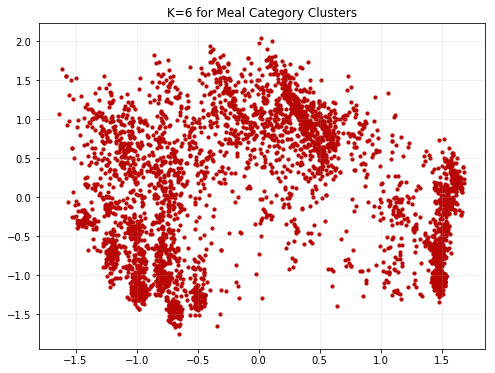

In [524]:
# plot clusters without cluster colors
fig = plt.figure(figsize = (8,6))
plt.scatter(x = clusters_meals_df['x6'], y = clusters_meals_df['y6'], s = 10)
plt.title('K=6 for Meal Category Clusters')
plt.grid(True, alpha=.2)

In [525]:
# assign colors for clusters
color_map_6 = {0 : '#9b59b6',
               1 : '#3498db',
               2 : '#95a5a6',
               3 : '#e74c3c',
               4 : '#34495e',
               5 : '#2ecc71',
               }

label_color = [color_map_6[l] for l in clusters_meals_df['cluster6']]

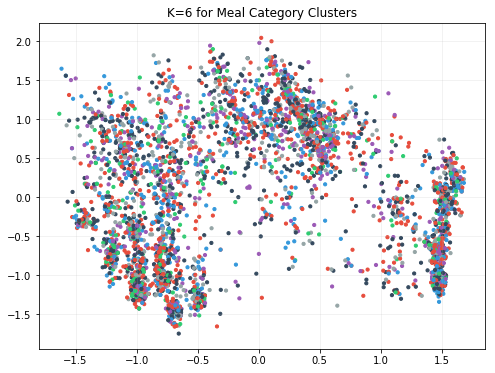

In [526]:
# plot clusters with cluster colors
fig = plt.figure(figsize = (8,6))
plt.scatter(x = clusters_meals_df['x6'], y = clusters_meals_df['y6'], s = 10, 
            c = label_color)
plt.title('K=6 for Meal Category Clusters')
plt.grid(True, alpha=.2)

In [527]:
centers

array([[ -3.46944695e-18,   1.75131349e-03,   1.31348511e-02, ...,
          4.21190893e-01,   1.15586690e-01,   1.68051337e-18],
       [  3.72023810e-03,   7.44047619e-04,   8.92857143e-03, ...,
          4.74702381e-01,   1.97916667e-01,   7.44047619e-04],
       [  4.61893764e-03,   4.72712147e-17,   1.92455735e-02, ...,
          5.74287914e-01,   1.50885296e-01,   3.30681663e-18],
       [  1.39599814e-03,   7.91065612e-03,   3.25732899e-03, ...,
          3.35039553e-02,   1.58213122e-01,   4.65332713e-04],
       [ -3.46944695e-18,   9.54198473e-04,   7.15648855e-03, ...,
          3.05820611e-01,   1.67461832e-01,   4.77099237e-04],
       [ -3.46944695e-18,   1.36425648e-03,   1.36425648e-02, ...,
          8.69031378e-01,   1.17326057e-01,  -5.74627151e-18]])

Ignoring the colors in the above plot, it would seem that there would be some relateively clear clusters. I could definitely see how k=3 would have provided us with the best silhouette score. But once we color code each point by cluster, it is utter chaos. There are no clearly colored clusters and all the colored points are scattered everywhere.

## Clustering by Categories where Recipe is Identified as a Meal and Rating is >= 4

We clearly need to have a better defined data set since there are no clear clusters above. Let's try clustering recipes that have been identified as a type of meal and have a rating of 4 or higher.

In [528]:
# remove rows with rating lower than 4
df_cats_meals_rating = df_cats_meals.loc[df_cats_meals['Rating'] >= 4].loc[:, :'Wisconsin']
df_cats_meals_rating.shape

(5064, 248)

In [529]:
# remove columns if there are no rows that have that category
df_cats_meals_rating.drop([col for col, val in df_cats_meals_rating.sum().iteritems() if 
                           val == 0], axis=1, inplace=True)
df_cats_meals_rating.shape

(5064, 233)

In [530]:
clusters_meals_rating_df = df_cats_meals[['Title','Breakfast', 'Lunch', 'Brunch', 
                                          'Dinner', 'Appetizer', 'Dessert']]

In [531]:
# transform binary category columns into a matrix
categories_matrix_meals_rating = np.matrix(df_cats_meals_rating.as_matrix())[:,8:]
categories_matrix_meals_rating.shape

(5064, 225)

In [532]:
categories_matrix_meals_rating

matrix([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ..., 
        [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

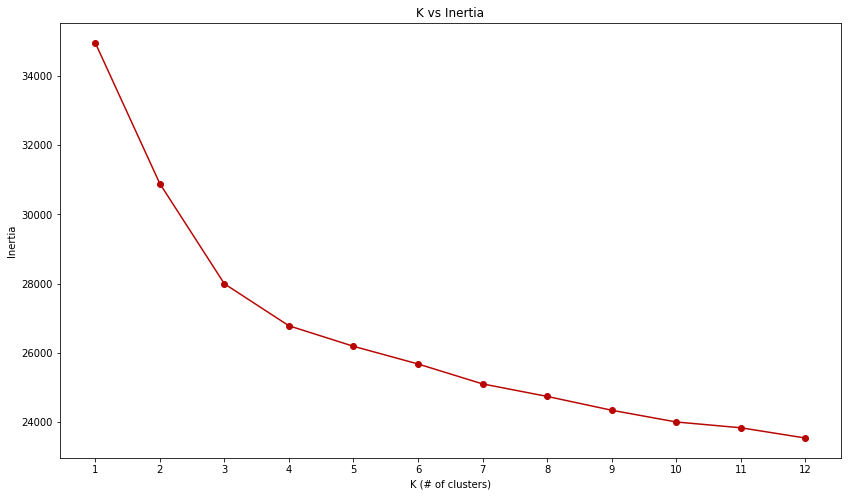

In [533]:
# iterate through Ks from 1 to 12 and append results to list
results_meals_rating = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(categories_matrix_meals_rating)   
    # Append the inertia to the list of results
    results_meals_rating.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_meals_rating, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The elbow here seems to appear around k=4

In [534]:
# initiate dictionary and range for for loop
avg_s_scores_meals_rating = {}
range_n_clusters = range(2,13)

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(categories_matrix_meals_rating)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(categories_matrix_meals_rating, cluster_labels)
    avg_s_scores_meals_rating[k] = silhouette_avg

In [535]:
# print all scores from dictionary
for key, value in avg_s_scores_meals_rating.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.1178
k = 3 : 0.1277
k = 4 : 0.1227
k = 5 : 0.1025
k = 6 : 0.0906
k = 7 : 0.0762
k = 8 : 0.0726
k = 9 : 0.0716
k = 10 : 0.0648
k = 11 : 0.0722
k = 12 : 0.0591


Let's compare the silhouette scores from before:

In [536]:
# print all scores from dictionary
for key, value1 in avg_s_scores_meals.items():
    value2 = avg_s_scores_meals_rating[key]
    print('k =', key, 'difference: ', round(value1-value2,4))
    
max1key = 0
max1value = 0
max2key = 0
max2value = 0

for key, value in avg_s_scores_meals.items():
    if value > max1value:
        max1key = key
        max1value = value
    
for key, value in avg_s_scores_meals_rating.items():
    if value > max2value:
        max2key = key
        max2value = value

print()
print('Meal categories highest k = %s with silhouette score of %.4f' % (max1key, max1value))
print('Meal categories with high ratings highest k = %s with silhouette score of %.4f' % (max2key, max2value))

k = 2 difference:  0.0012
k = 3 difference:  -0.0005
k = 4 difference:  -0.0012
k = 5 difference:  -0.0003
k = 6 difference:  0.0224
k = 7 difference:  0.0027
k = 8 difference:  -0.0094
k = 9 difference:  -0.008
k = 10 difference:  -0.002
k = 11 difference:  -0.0148
k = 12 difference:  0.0093

Meal categories highest k = 3 with silhouette score of 0.1272
Meal categories with high ratings highest k = 3 with silhouette score of 0.1277


For the max k of 3, the meal categories with ratings of 4 or higher results in a slightly higher silhouette score. But for k=6, our previous result without limiting recipes by rating gave us a higher silhouette score. Limiting our dataset to only recipes with a 4 or higher user rating has overall not improved our results.

## Tweaking K-Means Alrgorithm of Meal Categories with k=6

k=3 is our optimal result, but I'm going to stick with k=6 since having more segments makes sense to me. Let's tweak the algorithm to see if we can get some better results.

In [537]:
n_init_range = range(1,16,1)
max_n_init = 0
max_n_init_sil = 0

for n in n_init_range:

    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=6, random_state=10, n_init=n)    
    cluster_labels = kmeans.fit_predict(categories_matrix_meals)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(categories_matrix_meals, cluster_labels)
    print('n_init =', n,', silhouette score =', silhouette_avg)
    if max_n_init_sil < silhouette_avg:
        max_n_init = n
        max_n_init_sil = silhouette_avg

n_init = 1 , silhouette score = 0.107564223903
n_init = 2 , silhouette score = 0.116516592551
n_init = 3 , silhouette score = 0.116516592551
n_init = 4 , silhouette score = 0.116516592551
n_init = 5 , silhouette score = 0.116516592551
n_init = 6 , silhouette score = 0.113013097158
n_init = 7 , silhouette score = 0.113013097158
n_init = 8 , silhouette score = 0.113013097158
n_init = 9 , silhouette score = 0.113013097158
n_init = 10 , silhouette score = 0.113013097158
n_init = 11 , silhouette score = 0.113013097158
n_init = 12 , silhouette score = 0.113013097158
n_init = 13 , silhouette score = 0.113013097158
n_init = 14 , silhouette score = 0.113013097158
n_init = 15 , silhouette score = 0.113013097158


In [538]:
print('The optimal result is where n_init =', max_n_init, 
      'with a resulting silhouette score of', round(max_n_init_sil,4))

The optimal result is where n_init = 2 with a resulting silhouette score of 0.1165


## Clustering by Categories AND Ingredients where Recipe is Identified as a Meal

Considering the above result, I think that these clusters could be a little more clear cut. Let's see what happens when we specify meal categories on the dataframe that contains but categories and ingredients.

In [539]:
df_full['Meal Sum'] = df_full['Breakfast'] + df_full['Lunch'] + df_full[
                        'Brunch'] + df_full['Dinner'] + df_full['Appetizer'] + df_full[
                        'Dessert']

df_full_meals = df_full.loc[df_full['Meal Sum'] > 0].loc[:, '22-Minute Meals':'Zucchini']

# our Fat and Sodium columns are getting pulled in incorrectly
# we have enough categories, so simply remove them
df_full_meals.drop('Fat.1', axis=1, inplace=True)
df_full_meals.drop('Sodium.1', axis=1, inplace=True)

df_full_meals.shape

(8763, 587)

In [540]:
# let's also remove columns if there are no rows that have that category/ingredient
df_full_meals.drop([col for col, val in df_full_meals.sum().iteritems() if val == 0], axis=1, inplace=True)
df_full_meals.shape

(8763, 576)

In [541]:
# transform binary category columns into a matrix
full_matrix_meals = np.matrix(df_full_meals.as_matrix())[:,8:]
full_matrix_meals.shape

(8763, 568)

In [542]:
full_matrix_meals

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [543]:
# check to make sure all binary variables
for i, row in df_full_meals.iterrows():
    for j in row.index:
        if row[j] > 1:
            print(i, j, row[j])

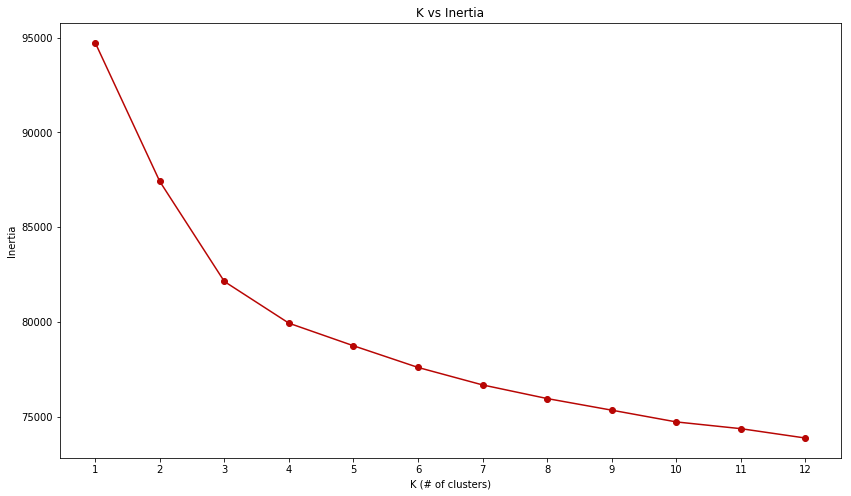

In [544]:
# iterate through Ks from 1 to 12 and append results to list
results_full_meals = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=10)    
    # Fit model to the matrix
    kmeans.fit(full_matrix_meals)   
    # Append the inertia to the list of results
    results_full_meals.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(14,8))
plt.plot(ks, results_full_meals, '-o')
plt.title('K vs Inertia')
plt.xlabel('K (# of clusters)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The elbow again seems to be at k=4, and no other number of clusters stands out to me.

In [545]:
# initiate dictionary and range for for loop
avg_s_scores_full_meals = {}

# test various sizes of k and save corresponding silhouette score
for k in range_n_clusters:

    # Initialize the clusterer with k value and a random generator
    clusterer = KMeans(n_clusters=k, random_state=10)    
    cluster_labels = clusterer.fit_predict(full_matrix_meals)   
    
    # compute silhouette score
    silhouette_avg = silhouette_score(full_matrix_meals, cluster_labels)
    avg_s_scores_full_meals[k] = silhouette_avg

In [546]:
# print all scores from dictionary
for key, value in avg_s_scores_full_meals.items():
    print('k =', key, ':', round(value,4))

k = 2 : 0.0776
k = 3 : 0.0799
k = 4 : 0.0772
k = 5 : 0.0594
k = 6 : 0.0446
k = 7 : 0.0438
k = 8 : 0.0382
k = 9 : 0.0383
k = 10 : 0.0394
k = 11 : 0.0285
k = 12 : 0.0343


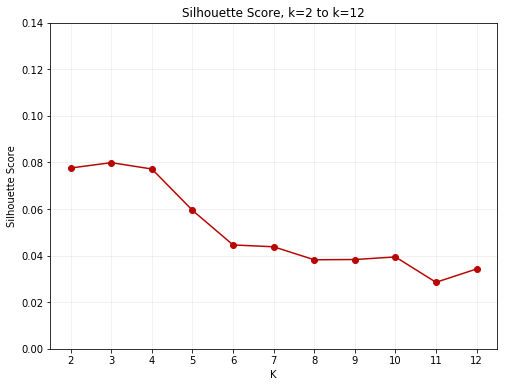

In [547]:
# plot silhouette score for each k
x, y = zip(*sorted(avg_s_scores_full_meals.items()))
plt.figure(figsize=(8,6))
plt.plot(x, y, '-o')
plt.xticks(range_n_clusters)
plt.yticks([0, .02, .04, .06, .08, .10, .12, .14])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score, k=2 to k=12')
plt.grid(True, alpha=.2)
plt.show()

Adding the ingredient columns to our dataset worsened our results. So far k=3 for our meal specified categories givees us the highest silhouette score. But perhaps we can get better results from a different algorithm. K-means is meant to provide us with a low number of clusters usually, so maybe we'll get better results from an algorithm that's meant to provide us with more clusters. Considering that we have so much data, I think that this could work out well. I also think that we should keep only including rows that have at least one meal tag, since it has so far provided us with the best results in the K-Means algorithm.

# DBScan

We will first test on categories_matrix_meals since it provided us with the best results in K-Means.

In [548]:
categories_matrix_meals = np.matrix(df_cats_meals.as_matrix())[:,8:]
categories_matrix_meals

matrix([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ..., 
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [549]:
categories_matrix_meals.shape

(8763, 240)

In [550]:
# this algorithm doesn't specify a number of clusters
# instead we'll study it with different min_samples
# we get an error if the range is greater than or equal to 4
min_samples_range = np.arange(5)

# initiate empty variables for max silhouette score and optimal min_samples factor
dbs_max_silhouette_avg = 0
dbs_max_optimal_ms = 0

for s in min_samples_range:
    
    # run DBScan
    dbs = DBSCAN(min_samples = s, eps=0.95)
    dbs_labels = dbs.fit_predict(categories_matrix_meals)
    
    # compute silhoette score
    silhouette_avg = silhouette_score(silhouette_avg, dbs_labels)
    #print("For min_samples = %s, the average silhouette_score is : %.4f" % (s, silhouette_avg))
    
    if silhouette_avg > dbs_max_silhouette_avg:
        dbs_max_silhouette_avg = silhouette_avg
        dbs_max_optimal_ms = s
        
print("The optimal min_samples factor is %i and yields an average silhouette score of %.4f" 
          % (dbs_max_optimal_ms, dbs_max_silhouette_avg))

ValueError: Found input variables with inconsistent numbers of samples: [1, 8763]

In [ ]:
# check to make sure all binary variables
for i, row in df_cats_meals.iloc[:,8:].iterrows():
    for j in row.index:
        if row[j] not in (0,1):
            print(i, j, row[j])